In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
from PIL import Image

# Emotion Data Set

In [2]:
# Folder path
TRAIN_DATA = os.path.join('EmotionDetection', 'data', 'train', '')
TEST_DATA = os.path.join('EmotionDetection', 'data', 'test', '')

In [9]:
# Define a function to load a dataset from the specified directory
def load_dataset(data):
    # Initialize empty lists to store image paths and corresponding labels
    image_paths = []
    labels = []

    # Iterate through each subdirectory (label) in the specified data directory
    for label in os.listdir(data):
        # Construct the full path to the current label's directory
        label_path = os.path.join(data, label)

        # Check if the current item in the directory is a subdirectory (label)
        if os.path.isdir(label_path):
            # Iterate through each file in the current label's directory
            for filename in os.listdir(label_path):
                # Skip the '.DS_Store' file if present (common in macOS)
                if filename != '.DS_Store':
                    # Construct the full path to the current image file
                    image_path = os.path.join(label_path, filename)
                    # Append the image path to the list of image paths
                    image_paths.append(image_path)
                    # Append the corresponding label to the list of labels
                    labels.append(label)
        
        # Print a message indicating that processing for the current label is completed
        print(label, 'Completed')
    # Return the list of image paths and labels after processing all images in the dataset
    return image_paths, labels

In [4]:
# Covert into dataframe - training set
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DATA)
# Shuffle the dataset
train = train.sample(frac = 1).reset_index(drop = True)
train.head()

happy Completed
.DS_Store Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,EmotionDetection/data/train/angry/17448.jpg,angry
1,EmotionDetection/data/train/happy/8227.jpg,happy
2,EmotionDetection/data/train/happy/7112.jpg,happy
3,EmotionDetection/data/train/fear/914.jpg,fear
4,EmotionDetection/data/train/happy/19270.jpg,happy


In [5]:
# Covert into dataframe - test set
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DATA)
test.head()

happy Completed
.DS_Store Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,EmotionDetection/data/test/happy/23933.jpg,happy
1,EmotionDetection/data/test/happy/24906.jpg,happy
2,EmotionDetection/data/test/happy/18033.jpg,happy
3,EmotionDetection/data/test/happy/15271.jpg,happy
4,EmotionDetection/data/test/happy/26888.jpg,happy


Emotion Categories - Training Data:
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: label, dtype: int64


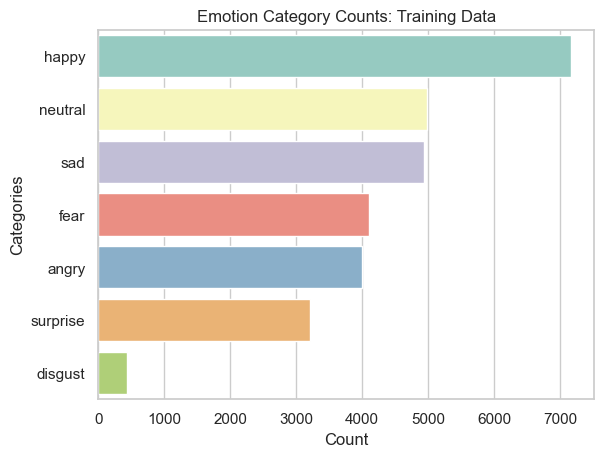

In [6]:
# Checking how many pictures there are under each category for train set
category_counts = train['label'].value_counts()
print("Emotion Categories - Training Data:")
print(category_counts)

# Create a countplot using Seaborn
sns.set(style='whitegrid')  # Set the style of the plot
sns.countplot(y='label', data=train, order=category_counts.index, palette="Set3")  # Create the countplot
plt.xlabel('Count')  # X-axis label 
plt.ylabel('Categories')  # Y-axis label
plt.title('Emotion Category Counts: Training Data')  # Plot title 
plt.show()  # Show the plot

Emotion Categories - Test Data:
happy       1825
neutral     1216
sad         1139
fear        1018
angry        960
surprise     797
disgust      111
Name: label, dtype: int64


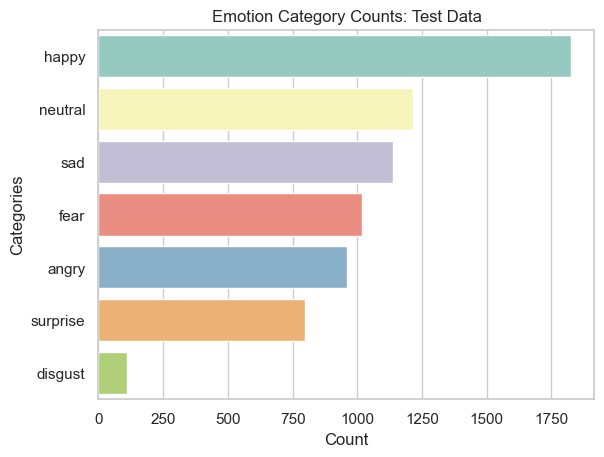

In [7]:
# Checking how many pictures there are under each category for test set
category_counts = test['label'].value_counts()
print("Emotion Categories - Test Data:")
print(category_counts)

# Create a countplot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot 
sns.countplot(y='label', data=test, order=category_counts.index, palette="Set3")  # Create the countplot
plt.xlabel('Count')  # X-axis label 
plt.ylabel('Categories')  # Y-axis label 
plt.title('Emotion Category Counts: Test Data')  # Plot title 
plt.show()  # Show the plot

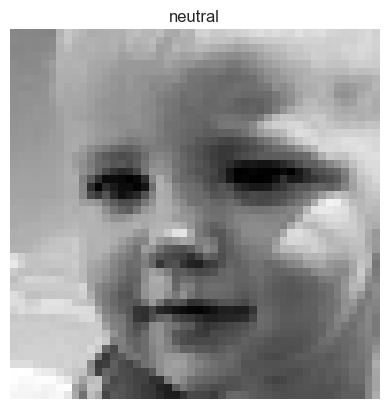

In [8]:
# Checking individual image and lable by changing the 'index_num'
index_num = 1006

img = Image.open(train['image'][index_num]).convert('L') # Open the image and convert to grayscale
plt.imshow(img, cmap = 'gray') # Display the grayscale image using a grayscale colormap
plt.title(train['label'][index_num])
plt.axis('off');

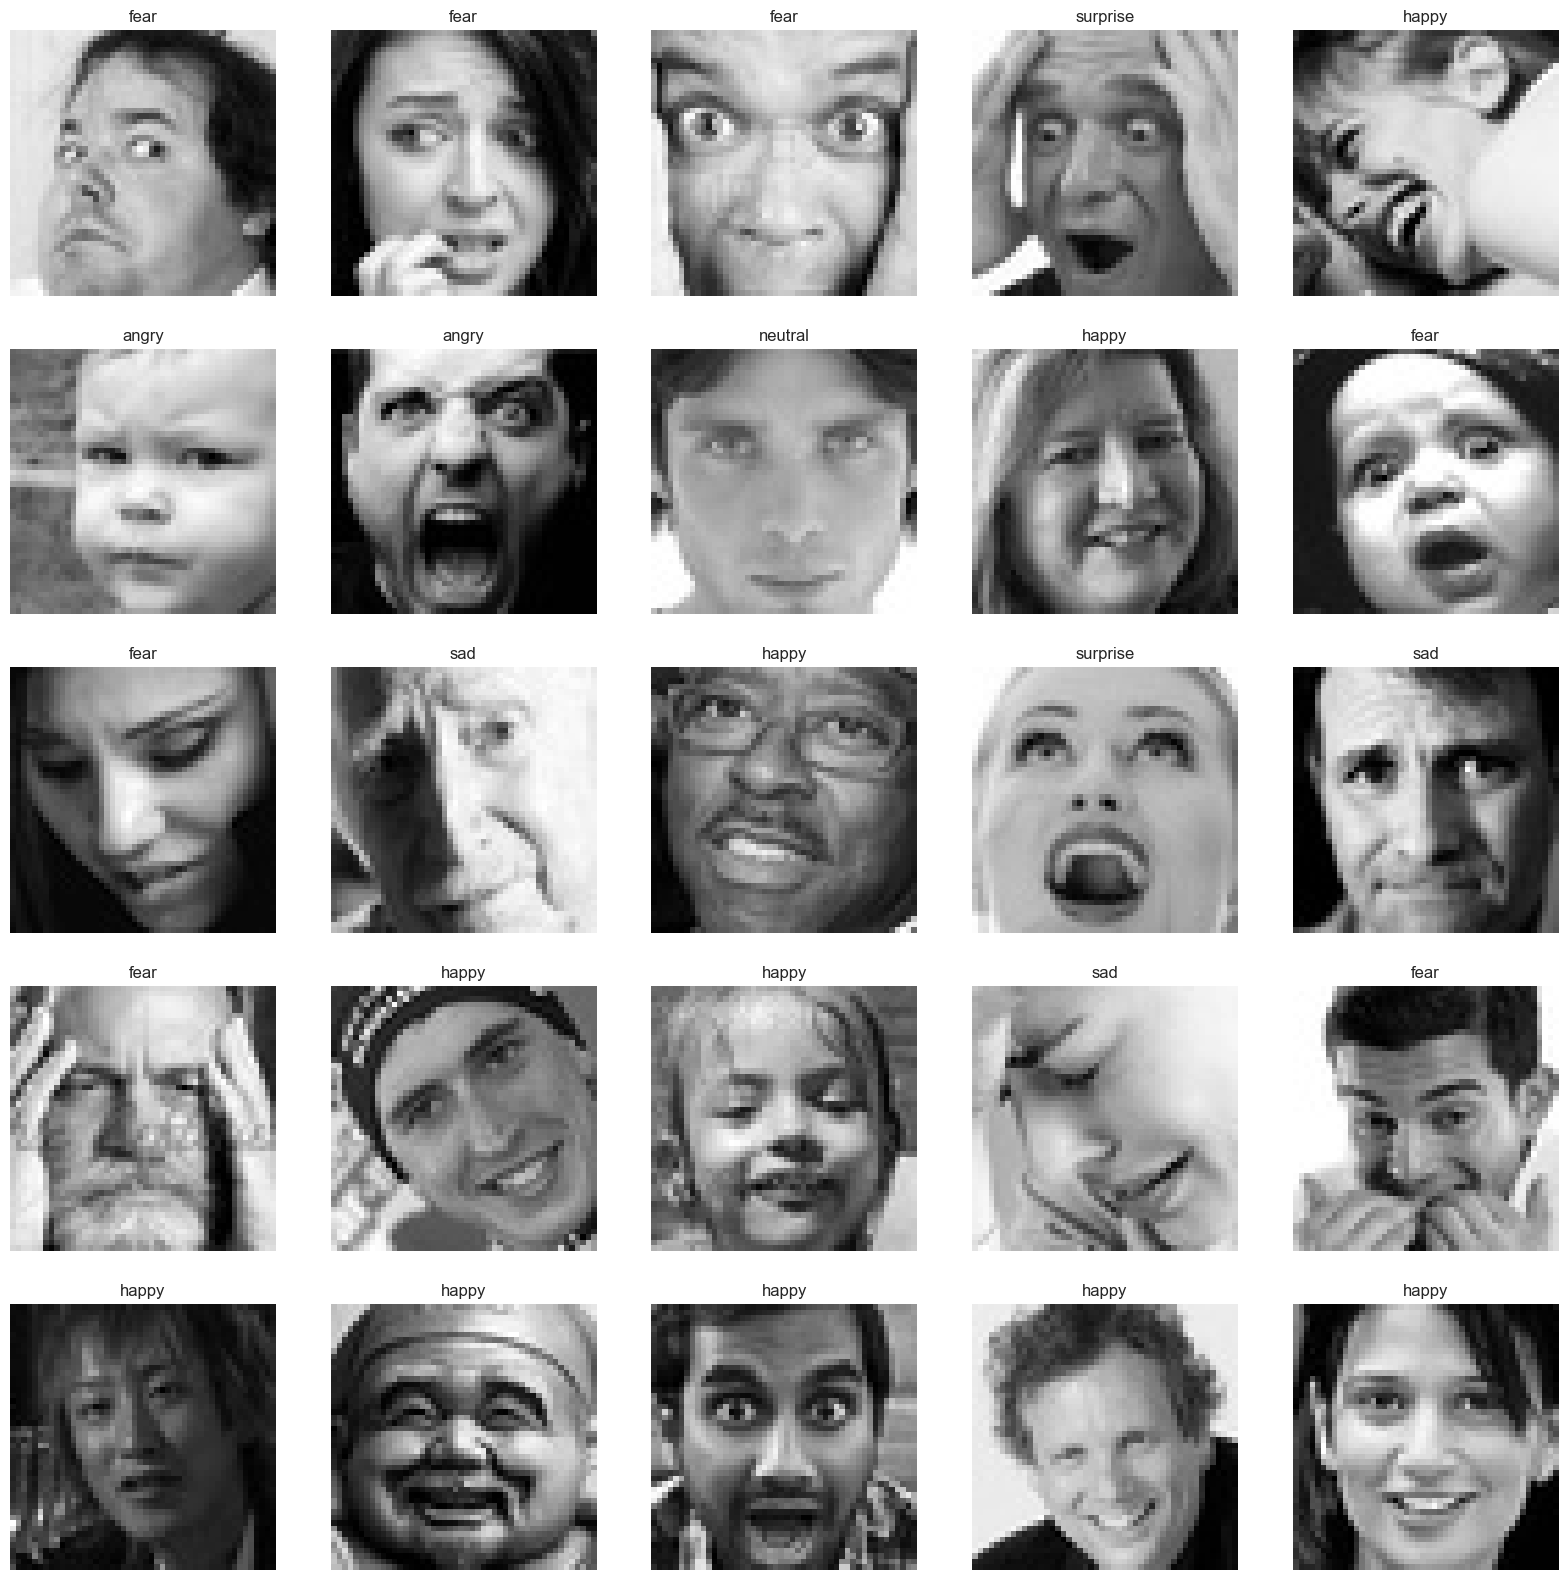

In [9]:
# Displaying grid of images
plt.figure(figsize=(20, 20))
files = train.iloc[0:25]

for index, row in files.iterrows():
    file, label = row['image'], row['label']
    img = Image.open(file).convert('L')  # Open the image and convert to grayscale
    plt.subplot(5, 5, index + 1)
    plt.imshow(img, cmap = 'gray') # Display the grayscale image using a grayscale colormap
    plt.title(label)
    plt.axis('off')

plt.show()


# Gender Data Set

In [15]:
# Folder paths for men and women images
MAN_DATA = os.path.join('GenderDetection', 'gender_dataset_face', 'man', '')
WOMAN_DATA = os.path.join('GenderDetection', 'gender_dataset_face', 'woman', '')

In [16]:
# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):  # Assuming images are in JPG format
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            images.append(img)
    return images

In [17]:
# Function to display sample images
def display_samples(images, label):
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 9)):  # Display up to 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(label)
        plt.axis('off')
    plt.show()

In [18]:
# Load images from the folders
man_images = load_images_from_folder(MAN_DATA)
woman_images = load_images_from_folder(WOMAN_DATA)

There are 1173 images of men in the data set.


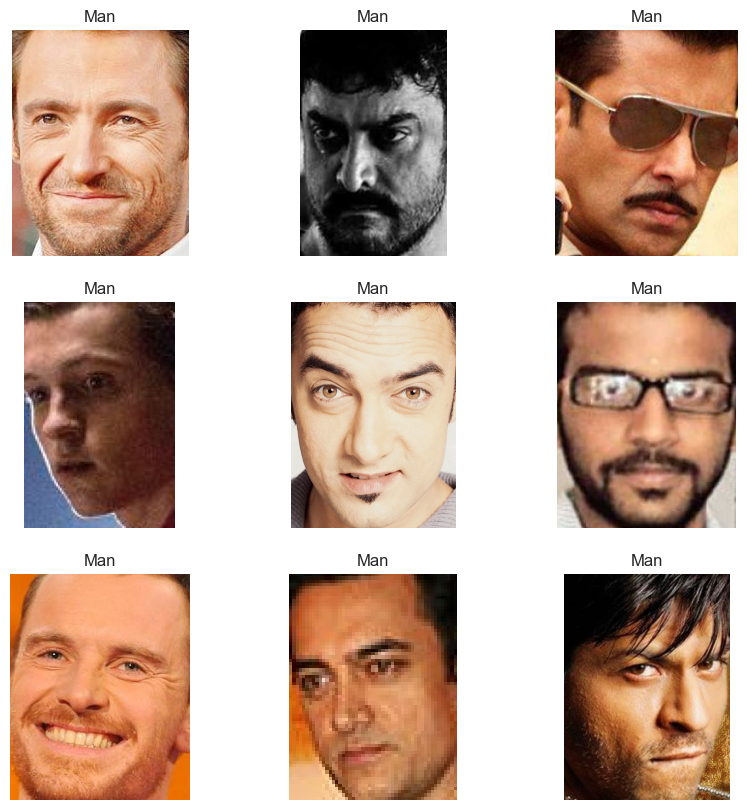

In [19]:
# Display sample images from the 'man' folder
print('There are ' + str(len(man_images)) + ' images of men in the data set.')
display_samples(man_images, label='Man')


There are 1134 images of women in the data set.


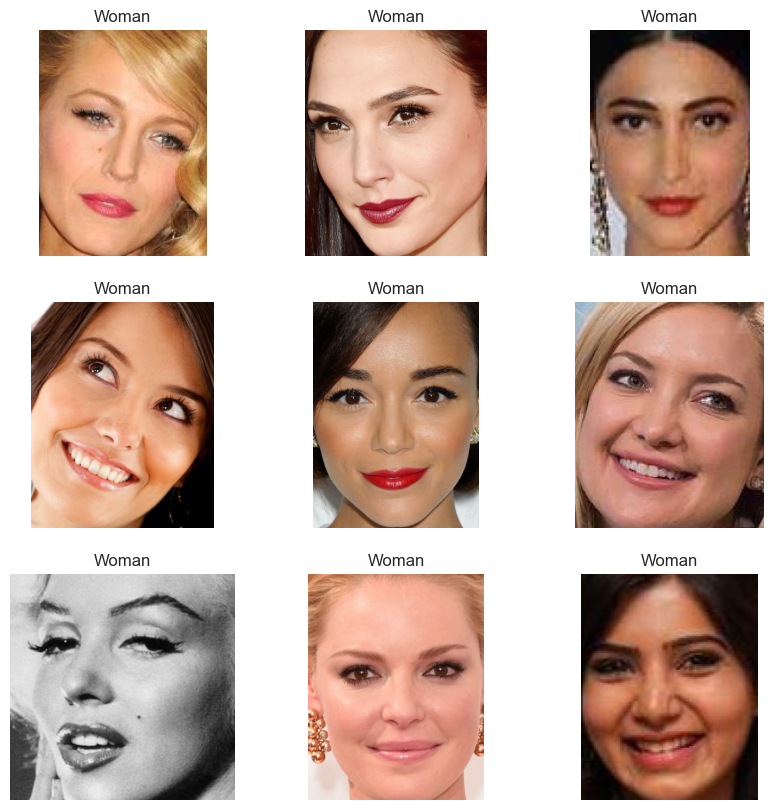

In [15]:
# Display sample images from the 'woman' folder
print('There are ' + str(len(woman_images)) + ' images of women in the data set.')
display_samples(woman_images, label='Woman')
